In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline


In [2]:
obj_trouves = pd.read_csv('data_week4/objets-trouves-restitution.csv',sep = ';',parse_dates=True, index_col = 'Date')

In [3]:
obj_trouves.head()

,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
Date,,,,,,
2017-06-20 14:05:25,NaN,Nîmes,87775007.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables",Objet trouvé
2017-08-10 15:33:37,2017-08-11T16:13:06+02:00,Boulogne Ville,87317586.0,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
2017-07-03 08:57:43,NaN,Nîmes,87775007.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
2017-08-11 07:26:05,2017-08-11T16:16:52+02:00,Dijon,87713040.0,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
2017-07-11 08:13:04,NaN,Nîmes,87775007.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Objet trouvé


In [4]:
obj_trouves['Type d\'enregistrement'].value_counts()

Objet trouvé    388268
Name: Type d'enregistrement, dtype: int64

In [5]:
# we can delete the column Type d'enregistrement 
obj_trouves.drop('Type d\'enregistrement',axis=1, inplace=True)

In [6]:
#Q1: Modify dates in index from 'YYYY-MM-DD HH:MM:SS' format to 'YYYY-MM-DD' fromat 
#Ex: 2017-07-03 08:57:43 --> 2017-07-03
# Save the result (I mean indexes of obj_trouves must be changed)
# Be careful to keep DateTimeIndex, you can do obj_trouves.index = pd.to_datetime(obj_trouves.index)

In [7]:
obj_trouves.index = pd.to_datetime(obj_trouves.index.date)
obj_trouves.head()

,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets
2017-06-20,NaN,Nîmes,87775007.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables"
2017-08-10,2017-08-11T16:13:06+02:00,Boulogne Ville,87317586.0,Téléphone portable,"Appareils électroniques, informatiques, appare..."
2017-07-03,NaN,Nîmes,87775007.0,Sac à dos,"Bagagerie: sacs, valises, cartables"
2017-08-11,2017-08-11T16:16:52+02:00,Dijon,87713040.0,Sac à dos,"Bagagerie: sacs, valises, cartables"
2017-07-11,NaN,Nîmes,87775007.0,"Clés, porte-clés","Clés, porte-clés, badge magnétique"


In [8]:
#Q2: Pivot obj_trouves to get a new dataframe with double indexing : Date and station (Gare) (BE CAREFUL OF THE ORDER)
# the values are the number of found objects per station for each Date (if at least one object is lost)

# Hints:
# Use only one column, 'Type d'objets' for example
# Use the aggregate function len to count the number of found objects

In [9]:
pivoted_df = pd.pivot_table(obj_trouves, index=[obj_trouves.index,'Gare'],values = 'Type d\'objets', aggfunc=len )
pivoted_df.head()

Type d'objets
           Gare                                           
2013-05-24 Aéroport Charles de Gaulle 2 TGV              1
           Paris Saint-Lazare                            8
           Strasbourg                                    8
2013-05-25 Strasbourg                                    9
2013-05-26 Strasbourg                                    2

In [10]:
pd.__version__

'0.20.3'

In [11]:
#Q3: Change the name of the column to 'Nb of found objects'

In [12]:
pivoted_df.columns = ['Nb of found objects']
pivoted_df.head()

Nb of found objects
           Gare                                                 
2013-05-24 Aéroport Charles de Gaulle 2 TGV                    1
           Paris Saint-Lazare                                  8
           Strasbourg                                          8
2013-05-25 Strasbourg                                          9
2013-05-26 Strasbourg                                          2

In [13]:
#Q4: Get the date and the station with the greatest number of found objects (Find this greatest number as well)

In [14]:
pivoted_df.idxmax()

Nb of found objects    (2017-09-26 00:00:00, Paris Gare de Lyon)
dtype: object

In [15]:
pivoted_df.loc[pivoted_df.idxmax()[0]]

Nb of found objects    121
Name: (2017-09-26 00:00:00, Paris Gare de Lyon), dtype: int64

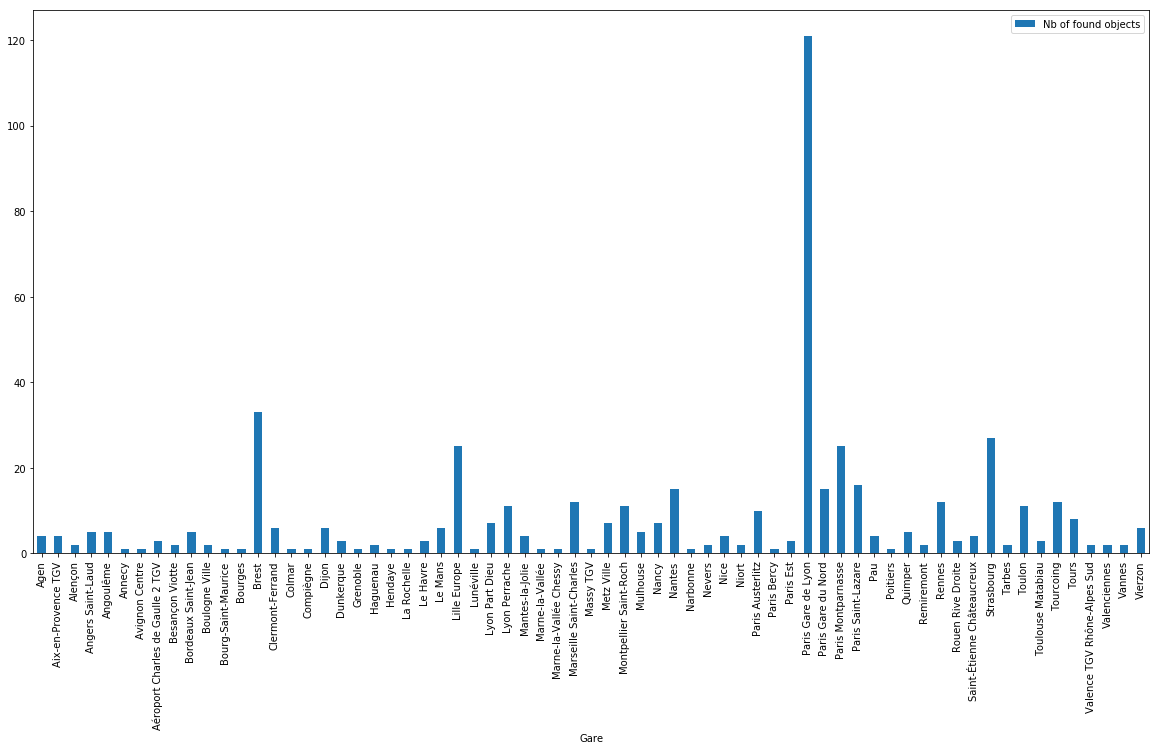

In [16]:
#Q5: Print a barplot showing number of found objects per station for the date found in Q4
pivoted_df.loc[pivoted_df.idxmax()[0][0]].plot(kind = 'bar',figsize = (20,10))

In [17]:
# Q6: Create a new dataframe indexed by the type of objects with
# one column for the numbers of found objects for each type in 2016

In [18]:
df = pd.pivot_table(obj_trouves.loc['2016'],index = 'Type d\'objets', values = 'Nature d\'objets',aggfunc=len)

In [19]:
df.head()

,Nature d'objets
Type d'objets,
"Appareils électroniques, informatiques, appareils photo",13603
"Articles d'enfants, de puériculture",1227
"Articles de sport, loisirs, camping",1143
Articles médicaux,621
"Bagagerie: sacs, valises, cartables",27197


In [20]:
#Q7 Plot a decreasing bar chart of the number of founds objects regarding types from the dataframe made in Q6

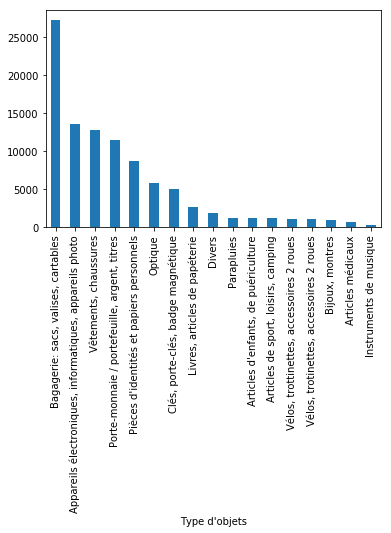

In [21]:
df['Nature d\'objets'].sort_values(ascending = False).plot(kind = 'bar')

In [22]:
stores = pd.read_csv("data_week4/SuperstoreSales.csv", encoding="latin1", parse_dates=["Order Date"])
stores.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10


In [23]:
#Q8: Create a pivot table to analyse sales regarding Customer Segments and product categories  
# We are intersted by different indicators : number of sales, median and sum of sales 
# Hint : use one index, one column, one value and three aggfunc

In [24]:
dff = pd.pivot_table(stores, index = ['Customer Segment'], columns='Product Category',values = 'Sales', aggfunc=[sum, np.median, len])
dff.head()

sum                                  median  \
Product Category    Furniture Office Supplies    Technology Furniture   
Customer Segment                                                        
Consumer          1128807.214       691382.23  1.243422e+06  1366.373   
Corporate         1862840.574      1341315.63  2.294749e+06  1323.670   
Home Office       1285345.918       960054.41  1.319364e+06  1571.980   
Small Business     901596.836       760009.83  1.126714e+06  1217.620   

                                                  len                  \
Product Category Office Supplies Technology Furniture Office Supplies   
Customer Segment                                                        
Consumer                 207.190   1074.065     358.0           865.0   
Corporate                205.475   1313.640     633.0          1680.0   
Home Office              223.640   1298.290     406.0          1145.0   
Small Business           202.475   1383.919     327.0           920.0   

                             
Product Category Technology  
Customer Segment             
Consumer              426.0  
Corporate             763.0  
Home Office           481.0  
Small Business        395.0

In [25]:
#Q9: Plot 3 bar plots for each indicator

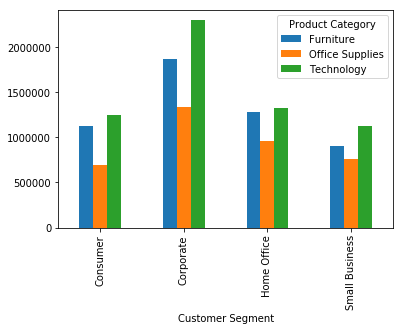

In [26]:
dff['sum'].plot(kind = 'bar')

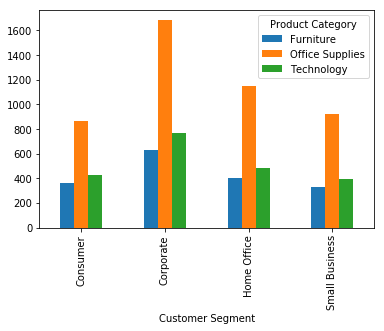

In [27]:
dff['len'].plot(kind = 'bar')

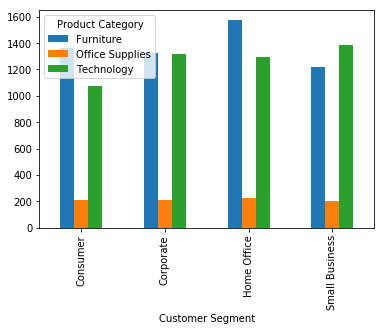

In [28]:
dff['median'].plot(kind = 'bar')